In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("bigdatamart_train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df["Item_Weight"]=df["Item_Weight"].replace(np.NAN,df["Item_Weight"].mean())

In [6]:
df["Outlet_Size"]=df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

NO NULL VALUES,SO WE CAN PROCEED FURTHER

FEATURE ENGINEERING

In [7]:
No_need = (df['Item_Visibility'] == 0)
No_need

0       False
1       False
2       False
3        True
4        True
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Visibility, Length: 8523, dtype: bool

Item_Visibility=0 makes no practical sense,So,we can replace it with mean

In [8]:
df['Item_Visibility']=df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())

CREATING BROAD CATEGORY OF TYPE OF ITEMS

In [9]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [10]:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable', 'DR':'Drinks'})      
df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [11]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [15]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

EDA PROCESS

In [16]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Combined',
       'Outlet_Years'],
      dtype='object')

In [17]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Type_Combined            object
Outlet_Years                   int64
dtype: object

DROPPING THE UNWANTED COLUMNS

In [18]:
df.drop(["Item_Identifier","Item_Type","Outlet_Establishment_Year"],axis=1,inplace=True)

In [19]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,9.300,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,5.920,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,17.500,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,19.200,Regular,0.066132,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,8.930,Non-Edible,0.066132,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,8.380,Regular,0.046982,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850,Food,11
8520,10.600,Non-Edible,0.035186,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,9
8521,7.210,Regular,0.145221,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


In [20]:
df.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Item_Type_Combined      0
Outlet_Years            0
dtype: int64

In [21]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,9.300,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,5.920,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,17.500,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,19.200,Regular,0.066132,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,8.930,Non-Edible,0.066132,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,8.380,Regular,0.046982,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850,Food,11
8520,10.600,Non-Edible,0.035186,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,9
8521,7.210,Regular,0.145221,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


ENCODING CATEGORICAL OBJECTIVE COLUMNS

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=["Item_Fat_Content","Item_Type_Combined","Outlet_Size","Outlet_Location_Type","Outlet_Type","Outlet_Identifier"]
for val in list:
    df[val]=le.fit_transform(df[val])
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,9.300,0,0.016047,249.8092,9,1,0,1,3735.1380,1,14
1,5.920,2,0.019278,48.2692,3,1,2,2,443.4228,0,4
2,17.500,0,0.016760,141.6180,9,1,0,1,2097.2700,1,14
3,19.200,2,0.066132,182.0950,0,1,2,0,732.3800,1,15
4,8.930,1,0.066132,53.8614,1,0,2,1,994.7052,2,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1,0,2,1,2778.3834,1,26
8519,8.380,2,0.046982,108.1570,7,1,1,1,549.2850,1,11
8520,10.600,1,0.035186,85.1224,6,2,1,1,1193.1136,2,9
8521,7.210,2,0.145221,103.1332,3,1,2,2,1845.5976,1,4


In [23]:
df["Outlet_Size"].value_counts()

1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

In [24]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.892995,0.070213,140.992782,4.722281,1.170832,1.112871,1.201220,2181.288914,1.093864,15.168133
std,4.226124,0.895005,0.048742,62.275067,2.837201,0.600327,0.812757,0.796459,1706.499616,0.522090,8.371760
min,4.555000,0.000000,0.003575,31.290000,0.000000,0.000000,0.000000,0.000000,33.290000,0.000000,4.000000
25%,9.310000,0.000000,0.033085,93.826500,2.000000,1.000000,0.000000,1.000000,834.247400,1.000000,9.000000
50%,12.857645,1.000000,0.062517,143.012800,5.000000,1.000000,1.000000,1.000000,1794.331000,1.000000,14.000000
75%,16.000000,2.000000,0.094585,185.643700,7.000000,2.000000,2.000000,1.000000,3101.296400,1.000000,26.000000
max,21.350000,2.000000,0.328391,266.888400,9.000000,2.000000,2.000000,3.000000,13086.964800,2.000000,28.000000


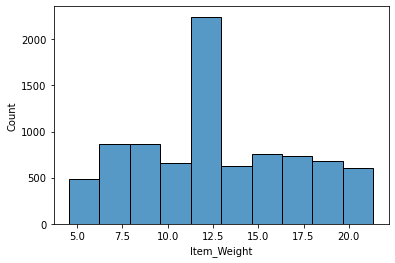

In [25]:
sns.histplot(x="Item_Weight",data=df,bins=10)
plt.show()

<AxesSubplot:xlabel='Item_Type_Combined', ylabel='Item_Outlet_Sales'>

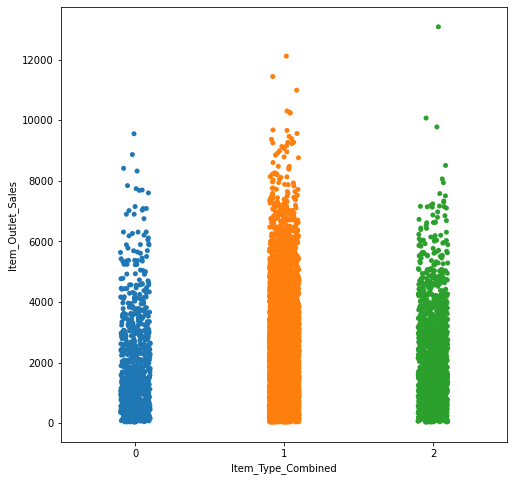

In [26]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Item_Type_Combined",y="Item_Outlet_Sales",data=df)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

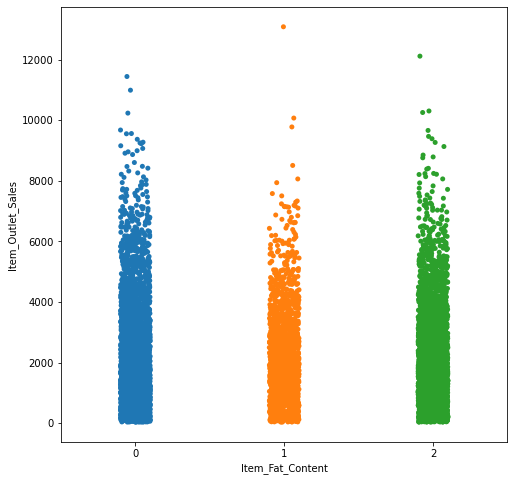

In [27]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=df)

In [28]:
df.skew()

Item_Weight             0.090561
Item_Fat_Content        0.211160
Item_Visibility         1.286877
Item_MRP                0.127202
Outlet_Identifier      -0.059861
Outlet_Size            -0.087072
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
Item_Outlet_Sales       1.177531
Item_Type_Combined      0.114510
Outlet_Years            0.396641
dtype: float64

Item_Weight                AxesSubplot(0.125,0.749828;0.133621x0.130172)
Item_Fat_Content        AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Item_Visibility          AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Item_MRP                AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Outlet_Identifier       AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Outlet_Size                AxesSubplot(0.125,0.593621;0.133621x0.130172)
Outlet_Location_Type    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Outlet_Type              AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Item_Outlet_Sales       AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Item_Type_Combined      AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Outlet_Years               AxesSubplot(0.125,0.437414;0.133621x0.130172)
dtype: object

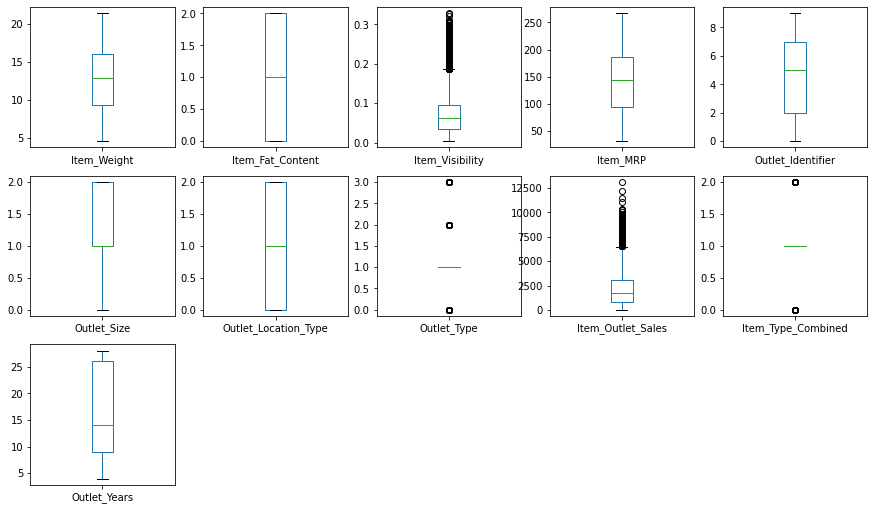

In [29]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

USING Z-SCORE METHOD TO REMOVE THE OUTLIERS

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.84187169, 0.99781318, 1.11135787, ..., 0.910601  , 0.17979501,
        0.13954076],
       [1.64170589, 1.23694223, 1.04506727, ..., 1.01844035, 2.09528612,
        1.33410274],
       [1.09855449, 0.99781318, 1.09673346, ..., 0.04923754, 0.17979501,
        0.13954076],
       ...,
       [0.53424315, 0.11956453, 0.71867224, ..., 0.57909963, 1.73569609,
        0.73682175],
       [1.33644372, 1.23694223, 1.53896846, ..., 0.19672492, 0.17979501,
        1.33410274],
       [0.45963367, 0.99781318, 0.51981553, ..., 0.82959407, 2.09528612,
        0.09937163]])

In [31]:
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,9.300,0,0.016047,249.8092,9,1,0,1,3735.1380,1,14
1,5.920,2,0.019278,48.2692,3,1,2,2,443.4228,0,4
2,17.500,0,0.016760,141.6180,9,1,0,1,2097.2700,1,14
3,19.200,2,0.066132,182.0950,0,1,2,0,732.3800,1,15
4,8.930,1,0.066132,53.8614,1,0,2,1,994.7052,2,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1,0,2,1,2778.3834,1,26
8519,8.380,2,0.046982,108.1570,7,1,1,1,549.2850,1,11
8520,10.600,1,0.035186,85.1224,6,2,1,1,1193.1136,2,9
8521,7.210,2,0.145221,103.1332,3,1,2,2,1845.5976,1,4


In [32]:
df.shape

(8523, 11)

In [33]:
8334/8523

0.9778247096092925

thus less than 4% data is removed by using z-score.so,the actual data is not much affected

In [34]:
df_new.skew()

Item_Weight             0.089363
Item_Fat_Content        0.210399
Item_Visibility         0.864331
Item_MRP                0.138877
Outlet_Identifier      -0.065455
Outlet_Size            -0.087810
Outlet_Location_Type   -0.202747
Outlet_Type             0.957677
Item_Outlet_Sales       0.877845
Item_Type_Combined      0.111713
Outlet_Years            0.423858
dtype: float64

Now there is not much skewness in the dataset

<AxesSubplot:>

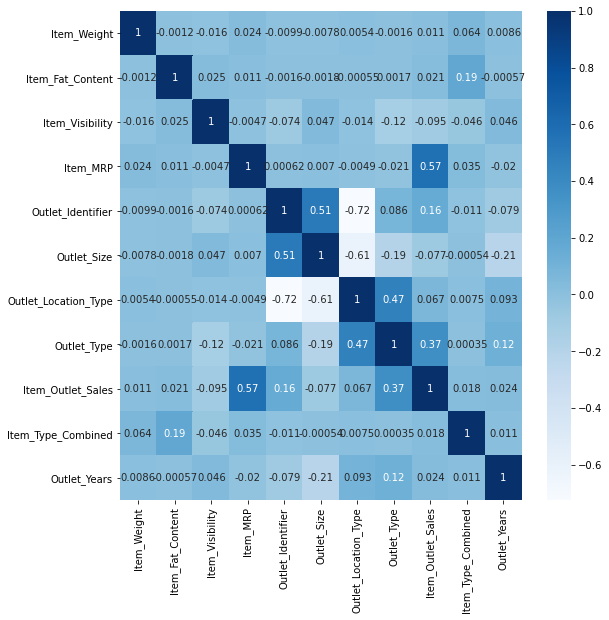

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")

In [36]:
x=df_new.loc[:, df_new.columns != 'Item_Outlet_Sales']
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years
0,9.300,0,0.016047,249.8092,9,1,0,1,1,14
1,5.920,2,0.019278,48.2692,3,1,2,2,0,4
2,17.500,0,0.016760,141.6180,9,1,0,1,1,14
3,19.200,2,0.066132,182.0950,0,1,2,0,1,15
4,8.930,1,0.066132,53.8614,1,0,2,1,2,26
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1,0,2,1,1,26
8519,8.380,2,0.046982,108.1570,7,1,1,1,1,11
8520,10.600,1,0.035186,85.1224,6,2,1,1,2,9
8521,7.210,2,0.145221,103.1332,3,1,2,2,1,4


In [37]:
y=df_new.iloc[:,8]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8334, dtype: float64

MACHINE LEARNING PROCESS

In [38]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=DecisionTreeRegressor()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.25434182866285493 on random state 163


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=163)

In [43]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",r2_score(pred_test,y_test))         
    print("training score",i.score(x_train,y_train))
    mse=mean_squared_error(pred_test,y_test)
    rmse=math.sqrt(mse)
    print("error=",rmse,"\n")

testing score= 0.07284358370508948
training score 0.48908330814899337
error= 1107.2653489705856 

testing score= 0.24520048064756583
training score 1.0
error= 1436.9758030153223 

testing score= -12.926156589986027
training score 0.18766577659780115
error= 1447.9597011043195 

testing score= 0.33219179242530994
training score 0.9335703203172467
error= 1060.7397733426867 

testing score= 0.3099959594929347
training score 0.6614001111514303
error= 1093.397467824043 



In [44]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    score=cross_val_score(i,x,y,cv=5) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [0.51582714 0.49590356 0.477794   0.49806816 0.49746028]
mean_score= 0.4970106277858436
std= 0.012048951002862091 

score= [0.2078509  0.1259043  0.10118456 0.15099692 0.15236541]
mean_score= 0.1476604206691705
std= 0.03546687944142425 

score= [0.19448215 0.21478725 0.20035834 0.20482141 0.20375187]
mean_score= 0.20364020209641592
std= 0.006637844036397218 

score= [0.542425   0.5290075  0.51086933 0.54763878 0.53497411]
mean_score= 0.5329829427402475
std= 0.012749328135877933 

score= [0.53943106 0.49021967 0.47326661 0.49451714 0.52381554]
mean_score= 0.5042500039274194
std= 0.023966920869746968 



REGULARIZATION 

In [45]:
ls=Lasso(alpha=1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.4888577863359901

In [46]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.48907830224836113

In [47]:
from sklearn.model_selection import cross_val_score
model=[Lasso(),Ridge()]
for i in model:
    score=cross_val_score(i,x,y,cv=5) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std())

score= [0.51556537 0.49544968 0.47715364 0.49835546 0.49749832]
mean_score= 0.4968044952573839
std= 0.012188920374349965
score= [0.5158472  0.49584461 0.47773234 0.49814135 0.49748894]
mean_score= 0.4970108879096407
std= 0.012077544929875589


Ridge Regression is the best fit model as there is less diff between cross_val_score and the actual accuracy 

HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
parameters={"fit_intercept":[True,False],"normalize":[True,False],"solver":["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"],"copy_X":[True,False]}

In [50]:
gcv=GridSearchCV(Ridge(),parameters,cv=5)

In [51]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [52]:
gcv.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False, 'solver': 'svd'}

In [53]:
final_model=Ridge(copy_X=True, fit_intercept=True, solver ="svd", normalize=False)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(r2_score(pred,y_test))
print("score=",final_model.score(x_train,y_train))
mse=mean_squared_error(pred,y_test)
rmse=math.sqrt(mse)
print(rmse)

0.0723004427236652
score= 0.48907830224836113
1107.3241434556066


saving the best model

In [54]:
import joblib

joblib.dump(final_model,"bigdatamartfile.obj")

['bigdatamartfile.obj']

In [55]:
x_test2=pd.read_csv("bigdatamart_test.csv")
x_test2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [56]:
x_test2["Item_Weight"]=x_test2["Item_Weight"].replace(np.NAN,x_test2["Item_Weight"].mean())
x_test2["Outlet_Size"]=x_test2["Outlet_Size"].fillna(x_test2["Outlet_Size"].mode()[0])
x_test2['Item_Visibility']=x_test2['Item_Visibility'].replace(0,x_test2['Item_Visibility'].mean())
x_test2['Item_Type_Combined'] = x_test2['Item_Identifier'].apply(lambda x: x[0:2])
x_test2['Item_Type_Combined'] = x_test2['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable', 'DR':'Drinks'})  
x_test2['Outlet_Years'] = 2013 - x_test2['Outlet_Establishment_Year']
x_test2['Item_Fat_Content'] = x_test2['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
x_test2.loc[x_test2['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
x_test2.drop(["Item_Identifier","Item_Type","Outlet_Establishment_Year"],axis=1,inplace=True)

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=["Item_Fat_Content","Item_Type_Combined","Outlet_Size","Outlet_Location_Type","Outlet_Type","Outlet_Identifier"]
for val in list:
    x_test2[val]=le.fit_transform(x_test2[val])
x_test2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years
0,20.750000,0,0.007565,107.8622,9,1,0,1,1,14
1,8.300000,2,0.038428,87.3198,2,1,1,1,1,6
2,14.600000,1,0.099575,241.7538,0,1,2,0,2,15
3,7.315000,0,0.015388,155.0340,2,1,1,1,1,6
4,12.695633,2,0.118599,234.2300,5,1,2,3,1,28
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,141.3154,8,2,0,1,1,16
5677,7.600000,2,0.142991,169.1448,3,1,2,2,1,4
5678,10.000000,1,0.073529,118.7440,7,1,1,1,2,11
5679,15.300000,2,0.065684,214.6218,2,1,1,1,1,6


In [58]:
bigdatamartfile_from_joblib=joblib.load("bigdatamartfile.obj")
bigdatamartfile_from_joblib.predict(x_test2)

array([2097.9209763 , 1217.95509358, 2185.29389732, ..., 1881.52456174,
       3065.40514238, 1318.30329159])